In [13]:
import xarray as xr
import os.path
import pandas as pd
from glob import glob
import matplotlib.pyplot as plt
import numpy as np

In [41]:
scenarios = ['ssp126', 'ssp370-lowNTCF', 'ssp370', 'ssp585', 'ssp245']

In [42]:
ssp_dataset = [xr.open_dataset(f'train_val/inputs_{s}.nc') for s in scenarios[:4]]
ssp_dataset.append(xr.open_dataset(f'test/inputs_{scenarios[-1]}.nc'))

## Plot CO2 data

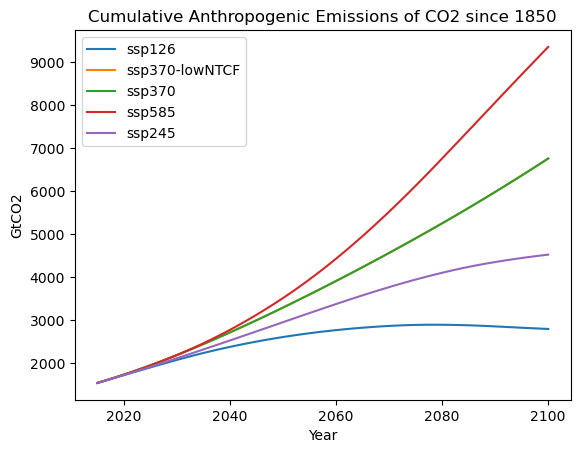

In [48]:
for s in range(len(scenarios)):
    ssp_data = ssp_dataset[s]
    plt.plot(ssp_data['time'], ssp_data['CO2'], label = scenarios[s])
plt.title("Cumulative Anthropogenic Emissions of CO2 since 1850")
plt.xlabel("Year")
plt.ylabel("GtCO2")
plt.legend()

## Plot CH4 data

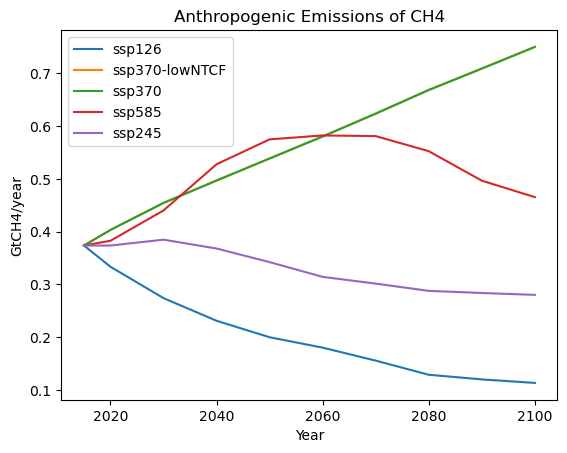

In [49]:
for s in range(len(scenarios)):
    ssp_data = ssp_dataset[s]
    plt.plot(ssp_data['time'], ssp_data['CH4'], label = scenarios[s])
plt.title("Anthropogenic Emissions of CH4")
plt.xlabel("Year")
plt.ylabel("GtCH4/year")
plt.legend()

## Plot SO2 data

In [54]:
weights = np.cos(np.deg2rad(ssp_dataset[0].latitude))
weights.name = "weights"

In [62]:
# num seconds in year = 31536000
# surface area of glob = 510.1 * 1e6 km^2
KGM2S_TO_TG = 31536000 * (510.1 * 1e6) * 1e6 * 1e-12 / 10 #idk why divide by ten

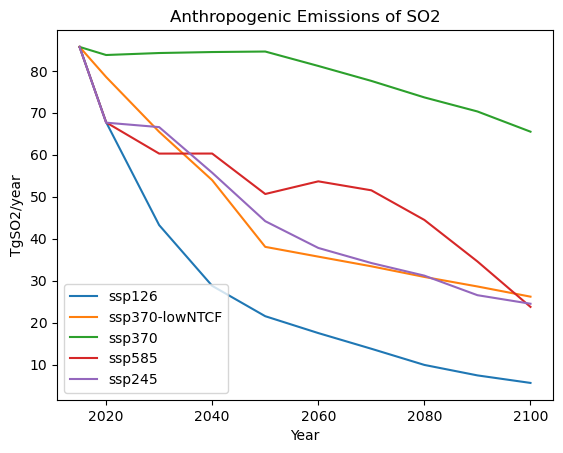

In [63]:
for s in range(len(scenarios)):
    ssp_data = ssp_dataset[s]
    plt.plot(ssp_data['time'], ssp_data['SO2'].weighted(weights).sum(['longitude','latitude']) * KGM2S_TO_TG, label = scenarios[s])
plt.title("Anthropogenic Emissions of SO2")
plt.xlabel("Year")
plt.ylabel("TgSO2/year")
plt.legend()

## Plot BC data

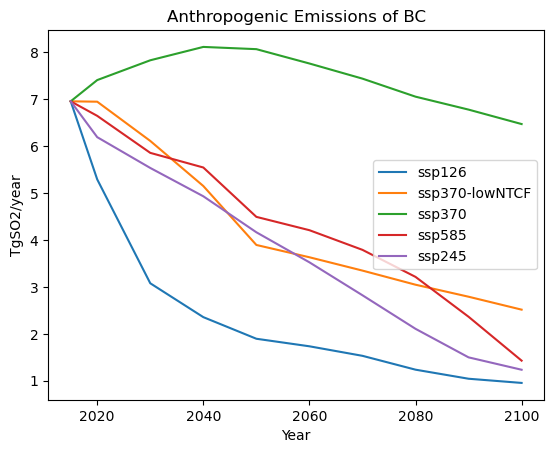

In [64]:
for s in range(len(scenarios)):
    ssp_data = ssp_dataset[s]
    plt.plot(ssp_data['time'], ssp_data['BC'].weighted(weights).sum(['longitude','latitude']) * KGM2S_TO_TG, label = scenarios[s])
plt.title("Anthropogenic Emissions of BC")
plt.xlabel("Year")
plt.ylabel("TgSO2/year")
plt.legend()